------------------

--------------------

In [118]:
# To install the qiskit 
%pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [64]:
# To run the jobs on real quantum computer
! pip install qiskit-ibm-runtime

In [65]:
#If you intend to use visualization functionality or Jupyter notebooks, 
#it is recommended to install Qiskit with the extra visualization support ('qiskit[visualization]').
! pip install 'qiskit[visualization]'

## Basics first

In [66]:
from qiskit import QuantumCircuit
from matplotlib import pyplot as plt


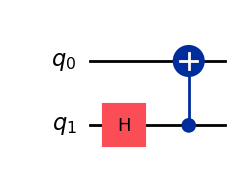

In [67]:
# THE HADAMARD & CNOT GATE
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1, 0)
qc.draw('mpl')

In [68]:
from qiskit.quantum_info import Statevector
sv = Statevector(qc)
sv.draw("latex")


<IPython.core.display.Latex object>

In [69]:
type(qc.draw('mpl'))

matplotlib.figure.Figure

## Reverse the qubit numbering 

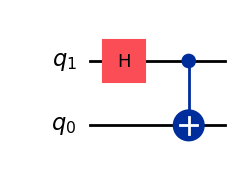

In [70]:
qc.draw('mpl', reverse_bits=True)

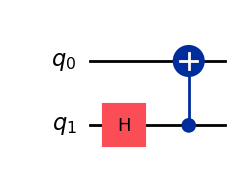

In [71]:
#rendering
qc.draw('mpl', fold = 2)

## Statevector 

In [72]:
from qiskit.quantum_info import *

In [73]:
sv = Statevector(qc)
sv.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

In [74]:
sv.draw('latex')

<IPython.core.display.Latex object>

In [75]:
sv.draw('text')

[0.70710678+0.j,0.        +0.j,0.        +0.j,0.70710678+0.j]

## Example 

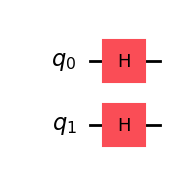

In [76]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.draw('mpl')

In [77]:
sv = Statevector(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

## Probabilities in state vectors 

In [78]:
probs = sv.probabilities()
print(probs)

[0.25 0.25 0.25 0.25]


## Counts 

In [79]:
counts = sv.sample_counts(shots= 1024)
print(counts)

{np.str_('00'): np.int64(245), np.str_('01'): np.int64(254), np.str_('10'): np.int64(245), np.str_('11'): np.int64(280)}


### what is the count of '01'

In [80]:
print(counts['01'])

# Similarly you will get the count for 00, 10, 11
#Try it out

254


## Visualize the results

In [81]:
from qiskit.visualization import plot_histogram

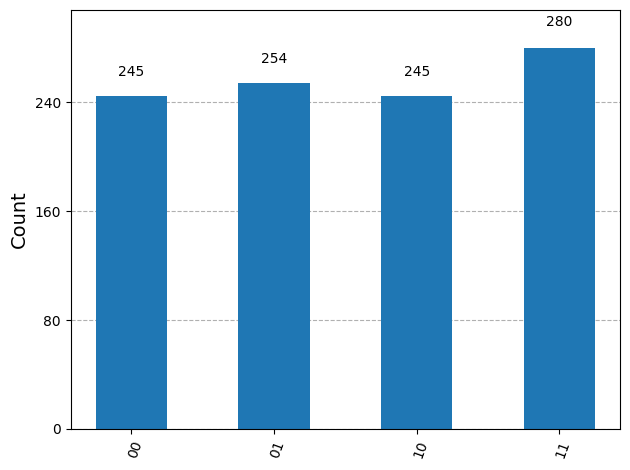

In [82]:
plot_histogram(counts)

## If you want to see every sample

In [83]:
samples = sv.sample_memory(shots = 100)
print(samples)

['01' '01' '00' '01' '01' '01' '00' '11' '01' '00' '01' '01' '00' '10'
 '10' '10' '11' '11' '01' '10' '10' '00' '11' '01' '11' '00' '01' '10'
 '00' '01' '10' '11' '10' '10' '01' '00' '11' '10' '00' '10' '01' '11'
 '00' '00' '00' '01' '01' '10' '00' '11' '11' '10' '00' '10' '11' '00'
 '00' '10' '11' '11' '01' '00' '00' '11' '10' '10' '00' '01' '11' '10'
 '11' '11' '11' '01' '01' '11' '10' '00' '00' '01' '11' '00' '11' '11'
 '01' '01' '11' '10' '10' '01' '01' '00' '11' '01' '10' '00' '00' '00'
 '00' '01']


## Evolve the state 

In [84]:
sv = Statevector(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

In [85]:
import numpy as np


var1 = 'iZZ'
p = Pauli(var1)
print(p)
op = Operator(p)
print(op)
sv.evolve(op).draw('latex')

iZZ
Operator([[ 0.+1.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -0.-1.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j, -0.-1.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+1.j]],
         input_dims=(2, 2), output_dims=(2, 2))


<IPython.core.display.Latex object>

## Creating a operator 

In [86]:
# O =  SparsePauliOp(['ZZ','XX','II'],[0.2,-0.3,0.4])
# O.to_operator()

## Operator = 0.2* ZZ + 0.4*II

O =  SparsePauliOp(['ZZ','II'],[0.2,0.4])
O.to_operator().draw('latex')

<IPython.core.display.Latex object>

In [87]:
ev = sv.evolve(O)
ev.draw('latex')

<IPython.core.display.Latex object>

In [88]:
sv.draw('latex')

<IPython.core.display.Latex object>

In [89]:
ev.draw('latex')

<IPython.core.display.Latex object>

In [90]:
O_exp= sv.expectation_value(O)
print(O_exp)

(0.39999999999999986+0j)


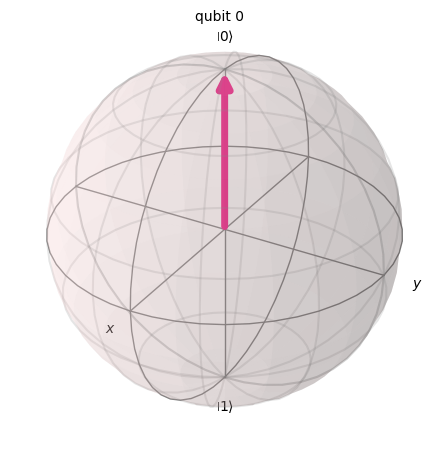

In [91]:
qc1 = QuantumCircuit(1)
# qc1.x(0)
sv1 = Statevector(qc1)
sv1.draw('bloch')


## Density matrix

In [92]:
density_mat = DensityMatrix(qc1)
density_mat.draw('latex')

<IPython.core.display.Latex object>

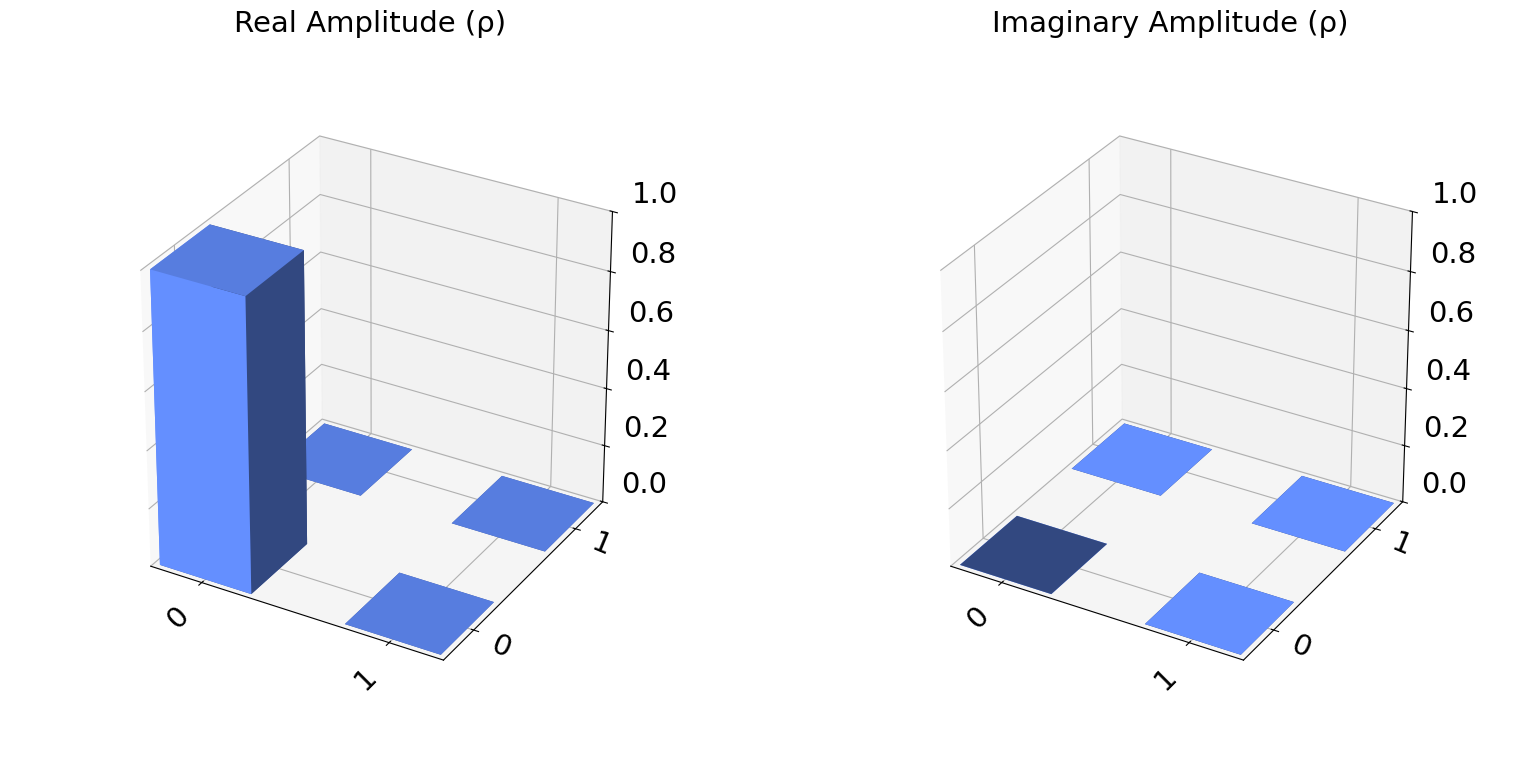

In [93]:
density_mat.draw('city')

In [94]:
Operator(sv1).draw('latex')

<IPython.core.display.Latex object>

## Measurement 

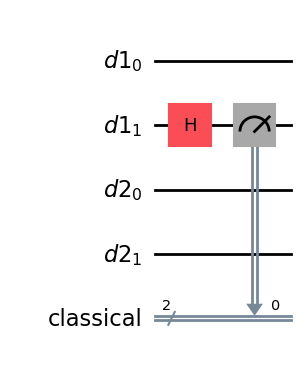

In [95]:
from qiskit import *

# Another way to define the quantum register 
data1 = QuantumRegister(2, 'd1')
data2 = QuantumRegister(2, 'd2')
classical_data = ClassicalRegister(2,'classical')

# Lot of things going on ...PAY ATTENTION!!!!!!!!

qc1 = QuantumCircuit(data1, data2, classical_data)
qc1.h(1)
qc1.measure(data1[1],classical_data[0])
qc1.draw('mpl') # FIGURE IS IMPORTRANT

## Simulate circuit using Basic Simulator
    BasicSimulator

In [96]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator


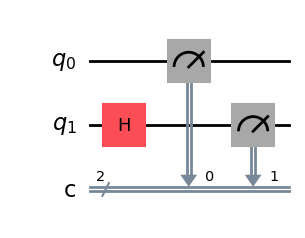

In [97]:
qc1 = QuantumCircuit(2,2)
qc1.h(1)
qc1.measure([0,1],[0,1]) # arugemts will be quantum specifier then classical specifier

# qc1.measure(0,0)
qc1.draw('mpl')

In [98]:
# first we need the simulator
simulator_basic = BasicSimulator()

# now run the cirucit using that simulator 
# shots is the number of times we want to run the circuit

job = simulator_basic.run(qc1,shots = 1024)

#Once we have the job , we can get the result 
result = job.result()
print(result)

Result(backend_name='basic_simulator', backend_version='0.1', job_id='79764b36-8e4b-4a11-97ea-31446e6e88f0', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 538, '0x2': 486}, memory=['0x0', '0x0', '0x2', '0x2', '0x2', '0x2', '0x2', '0x2', '0x0', '0x2', '0x2', '0x0', '0x0', '0x2', '0x0', '0x2', '0x2', '0x2', '0x2', '0x2', '0x0', '0x2', '0x2', '0x0', '0x0', '0x2', '0x2', '0x0', '0x0', '0x0', '0x0', '0x2', '0x2', '0x2', '0x2', '0x0', '0x0', '0x2', '0x0', '0x0', '0x0', '0x2', '0x0', '0x2', '0x2', '0x0', '0x0', '0x2', '0x0', '0x2', '0x0', '0x2', '0x2', '0x0', '0x0', '0x0', '0x2', '0x2', '0x0', '0x2', '0x0', '0x2', '0x0', '0x2', '0x2', '0x2', '0x2', '0x2', '0x2', '0x0', '0x2', '0x2', '0x2', '0x2', '0x2', '0x0', '0x0', '0x0', '0x2', '0x0', '0x0', '0x0', '0x2', '0x0', '0x2', '0x2', '0x0', '0x2', '0x0', '0x0', '0x2', '0x0', '0x2', '0x2', '0x2', '0x2', '0x0', '0x2', '0x2', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0

In [99]:
# Now fetch the important info according to our need. 

counts = result.get_counts() 
print(counts)

# Rememeber the order of the bits in the result is right to left. 
# So 01 means 1 in the first qubit and 0 in the second qubit.

{'00': 538, '10': 486}


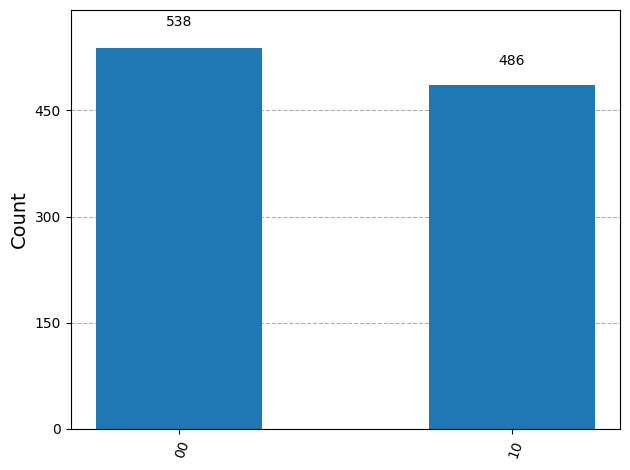

In [100]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)


#### Sample memory method

In [101]:
job = simulator_basic.run(qc1, shots = 10, memory = True)
result = job.result()
samples = result.get_memory()
print(samples)

['00', '10', '00', '00', '00', '00', '00', '10', '10', '10']


## Limitations of Basic_simulator 

/var/folders/1l/g3s1ytv57hv98hl39w041lxm0000gp/T/ipykernel_65565/144873715.py:3: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(3),range(3))


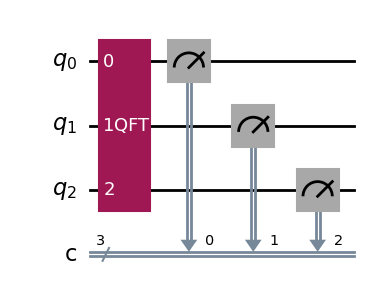

In [102]:
from qiskit.circuit.library import QFT
qc = QuantumCircuit(3,3)
qc.append(QFT(3),range(3))
qc.measure(range(3),range(3))
qc.draw('mpl')

In [103]:
job = simulator_basic.run(qc, shots = 10, )

BasicProviderError: 'basic_simulator encountered unrecognized operation "QFT"'

### basic_simulator encountered unrecognized operation "QFT"' 
Above error is because of "QFT is not the part of basic gates that simulator can run". 

For this we need to transpile the the circuit : which means taking a certain type of circuit translating into gate


In [104]:
from qiskit import transpile

qc_t = transpile(qc, backend = simulator_basic)
job = simulator_basic.run(qc_t,shots= 1024)
result = job._result
counts = result.get_counts()
print(counts)

{'111': 135, '001': 125, '010': 140, '000': 129, '100': 126, '110': 125, '011': 117, '101': 127}


## Qiskit_Aer 


### Instal the package 

In [105]:
! pip install qiskit_aer

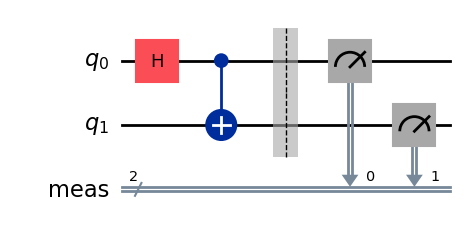

In [106]:
qc = QuantumCircuit(2)

# Apply a Hadamard gate on the first qubit
qc.h(0)

# Apply a CNOT gate with the first qubit as control and the second as target
qc.cx(0, 1)

qc.measure_all()
# Display the circuit
qc.draw('mpl')

In [107]:
from qiskit_aer import Aer

simulator = Aer.get_backend('aer_simulator')

In [108]:
circuit = transpile(qc, simulator, optimization_level=3)
job = simulator.run(circuit, shots=256)
result = job.result()

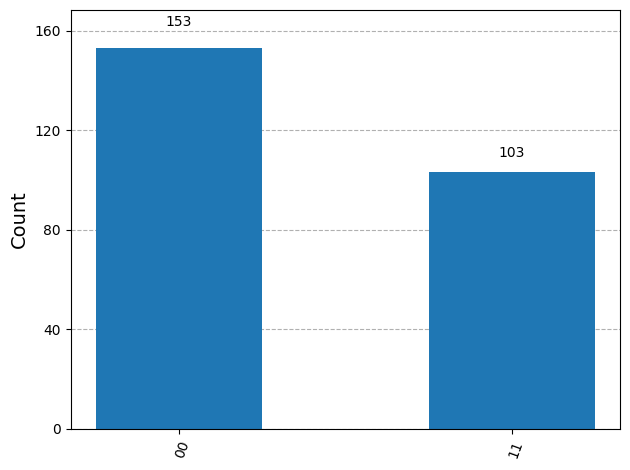

In [109]:
counts = result.get_counts()
counts
plot_histogram(counts)

In [110]:
q = max(counts, key = counts.get)
counts[q]

153

-------------

## Conditions

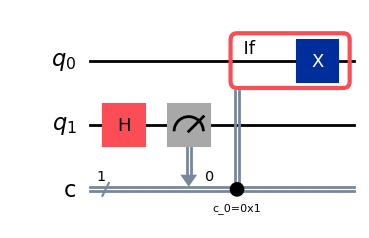

In [111]:
qc = QuantumCircuit(2,1)
qc.h(1)
qc.measure(1,0)
with qc.if_test((qc.clbits[0], 1)):
    qc.x(0)



qc.draw('mpl')


## Teleportation

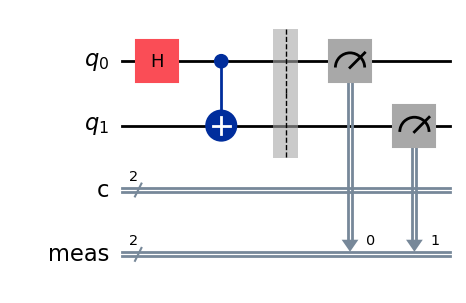

In [112]:
#create Alice & Bob bits which is a bell state ∣Φ+⟩= 1/2(∣00⟩+∣11⟩
# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 1: Apply Hadamard gate to qubit 0
qc.h(0)

# Step 2: Apply CNOT gate (control=0, target=1)
qc.cx(0, 1)

# Optional: Measure the qubits
qc.measure_all()

# Draw the circuit
qc.draw('mpl')

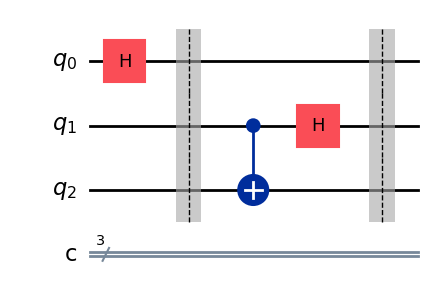

In [113]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Step 1: Prepare the quantum state to be teleported on qubit 0
qc.h(0)  # |+> state as an example of unknown state
qc.barrier()

# Step 2: Create entanglement (Bell pair) between qubit 1 and 2
# case 1: |Φ+⟩= 1/2(∣00⟩+∣11⟩
#qc.h(1)
#qc.cx(1, 2)
# case 2: |Φ−⟩= 1/2(∣00⟩−∣11⟩
# qc.h(1)
# case 3: |Ψ+⟩= 1/2(∣01⟩+∣10⟩
# qc.x(1)
# case 4: |Ψ−⟩= 1/2(∣01⟩−∣10⟩
qc.cx(1, 2)
qc.h(1)
qc.barrier()
qc.draw('mpl')



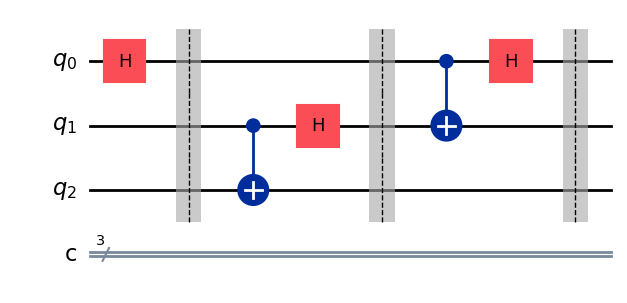

In [114]:
# Step 3: Alice's Bell measurement on qubit 0 and 1
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Draw the circuit
qc.draw('mpl')

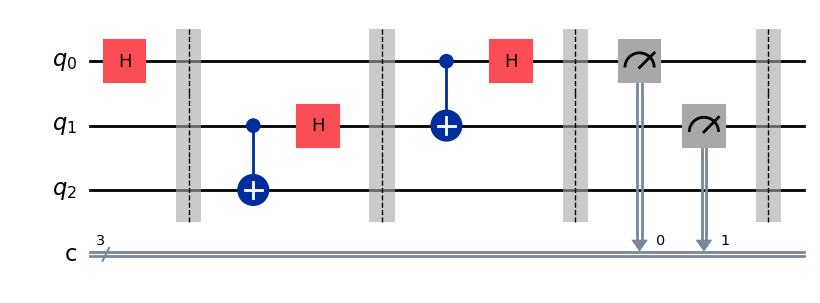

In [115]:
# Step 4: Alice measures qubit 0 and 1
qc.measure(0, 0)
qc.measure(1, 1)
qc.barrier()

qc.draw('mpl')

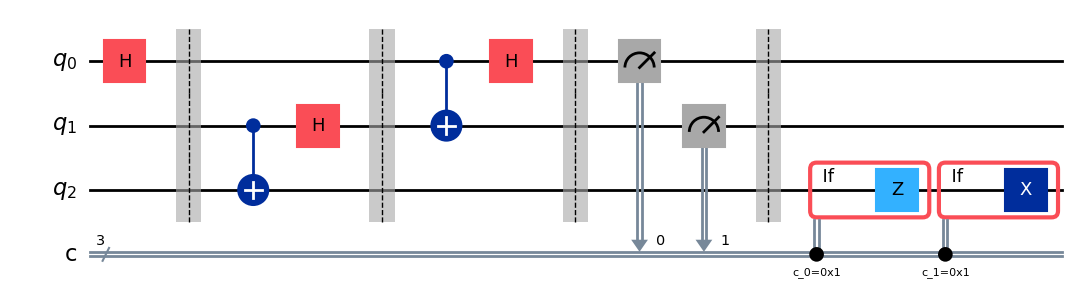

In [116]:
# Step 5: Bob applies corrections based on classical bits

with qc.if_test((qc.clbits[0], 1)): # Apply Z if bit 0 is 1
    qc.z(2)
    
with qc.if_test((qc.clbits[1], 1)):  # Apply X if bit 1 is 1
    qc.x(2)
    
# Draw the circuit
qc.draw('mpl')



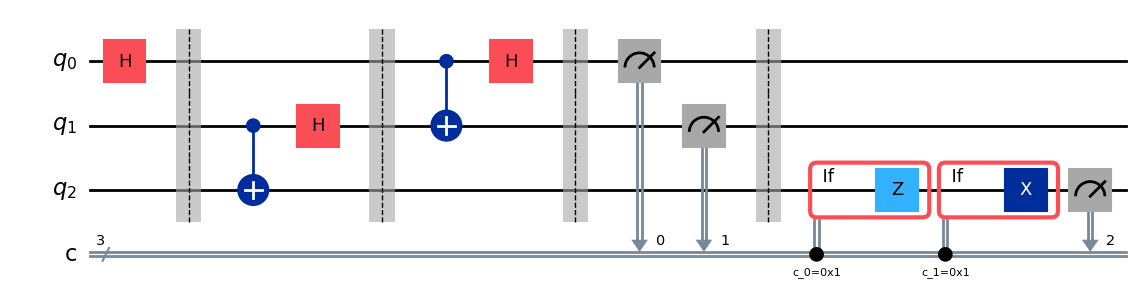

In [117]:
# Step 6: Optional - measure Bob's qubit
qc.measure(2, 2)

# # Draw the circuit
qc.draw('mpl')